In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
# we extract i/p and o/p column

X = data.data
y = data.target

In [5]:
# call for train_test_split model

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=45)

In [6]:
# Apply for linear regression 

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
print(lr.intercept_)
print(lr.coef_)

152.13623331746496
[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]


In [9]:
# predict the model

y_pred = lr.predict(X_test)

In [10]:
# check for accuracy

from sklearn.metrics import r2_score, mean_squared_error

print("R2_score:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))  

R2_score: 0.5188113124539246
RMSE: 48.727137609532534


In [11]:
# Now, we are going to doo the same thing with the help of "Ridge_Regression"

In [12]:
from sklearn.linear_model import Ridge

R = Ridge(alpha=0.0001)      #  'lambda' (extra term for ridge regression) is alpha here.

In [13]:
R.fit(X_train, y_train)

,alpha,0.0001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [14]:
print(R.intercept_)
print(R.coef_)

152.13492030963658
[  23.51763492 -247.31766656  492.28244914  329.3317593  -957.46324421
  562.90310325  176.71070198  254.47033329  789.10867561   89.41375823]


In [15]:
y_pred1 = R.predict(X_test)

In [19]:
print("R2_score:", r2_score(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))

R2_score: 0.518973263588495
RMSE: 48.718937001819555


In [22]:
# So, "Ridge_Regression" performs slightly better than "Linear_Regression" 
# Also,this regression is less complex than the 'Linear_Regression'

In [27]:
# Now, let's look how 'over-fitting' and 'under-fitting' happened in the case of "Ridge_Regression"

m=100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1**2  -  2 * x1  +  3  + np.random.randn(m, 1)

# we generate the dataset which is the kind of 'non-linear'

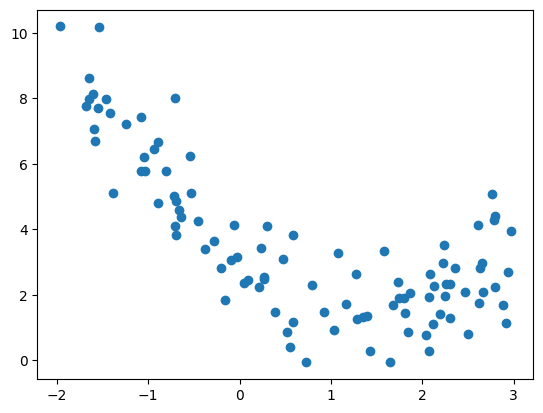

In [26]:
plt.scatter(x1, x2)
plt.show()

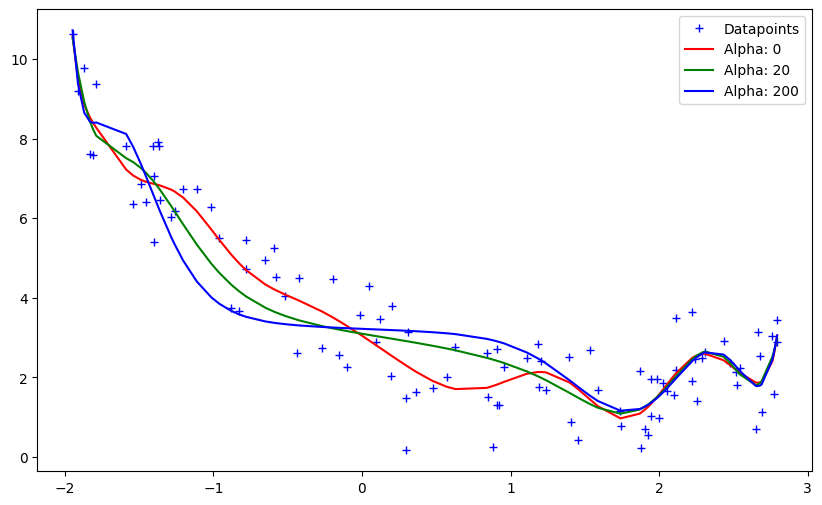

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),     # we apply here 'Polynomial_Regression' of (degree=16)
        ('ridge', Ridge(alpha=alpha))                      # now, we solve it by using "Ridge_Regression" instead of "Linear_Regression"
    ])
    model.fit(x1, x2)
    return model.predict(x1)

# we try here for 2 values of alpha(lambda)
# alpha=0,it means yha 'Ridge_Regression' apply hoga hi nhi(bcz after multiplying with lambda=0, all slope becomes zero.)
     # And,your model will perform exactly similar to the "Linear_Regression"
# alpha=20, it is the optimum value, jha pe hmlg ko shi curve dikhai dega
# alpha=200, yha pe 'under-fitting' hone lgega,b/c hm yha pe apne slopes ka weight bhut km kr rhe hai.... 

alphas = [0, 20, 200]   
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()               

In [33]:
# So, when our alpha=0, it's the case of "Over-fitting"
# when our alpha=20, it's the case of optimal solution(b/c yeh bich ka raasta nikal rha hai)
# when our alpha=200, it's the case of "under-fitting" b/c yeh bilkul bhi try nhi kr rha hai pattern pick krne ko(b/c alpha is very high)